In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo 

from sklearn.metrics import accuracy_score

## aesthetic evaluation dataset

In [2]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective = aesthetic_evaluation_data['Objective Evaluation']
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [3]:
aesthetic_evaluation_y.value_counts()

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Subjective Evaluation')

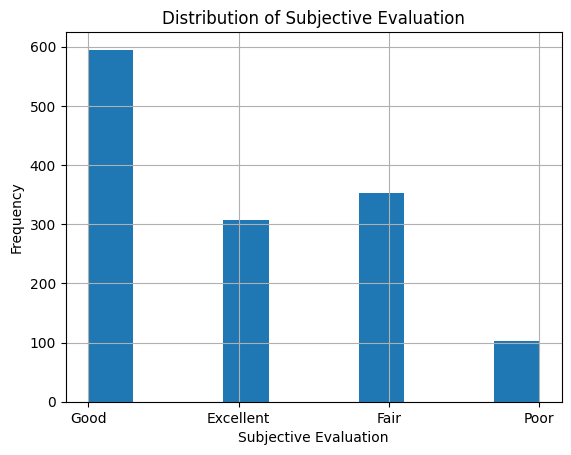

In [4]:
aesthetic_evaluation_y.hist()
plt.xlabel('Subjective Evaluation')
plt.ylabel('Frequency')
plt.title('Distribution of Subjective Evaluation')

In [5]:
# accuracy of 'objective evaluation' (relative to the target, 'subjective evaluation')
acc = accuracy_score(aesthetic_evaluation_y, aesthetic_evaluation_objective)
print(f'Accuracy of objective evaluation: {acc}')

Accuracy of objective evaluation: 0.5876288659793815


In [6]:
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")

Categorical columns: Index([], dtype='object')


SBC reduction
number of features:  22
original num target classes:  4
original num observations:  1358
mapping:  0         Good
1    Excellent
2         Fair
3         Poor
dtype: object
new num features:  23
new num target classes:  2
new num observations:  4074  (original num observations * 3 )
          0         1         2         3         4          5          6  \
0  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
1  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
2  1.149009  0.830915  0.107618  0.938534  1.934477   4.885198  17.296370   
3  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   
4  2.368824  1.326447  1.599444  0.272997  0.035378  19.932998  68.761479   

          7         8         9  ...        14        15        16        17  \
0  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   
1  0.049401  0.033356  0.005522  ...  0.097502  0.009506  0.217169  0.100670   

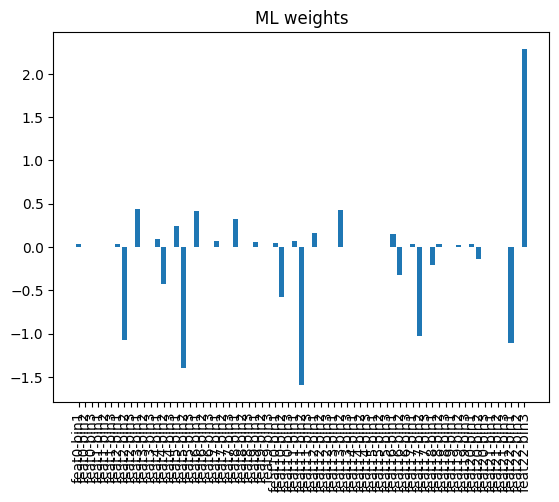

num of zero weights:  38
num of non-zero weights:  31
        Feature    Weight
0    feat0-bin1  0.037302
1    feat0-bin2 -0.002128
6    feat2-bin1  0.031487
7    feat2-bin2 -1.071214
9    feat3-bin1  0.437258
12   feat4-bin1  0.092531
13   feat4-bin2 -0.423715
15   feat5-bin1  0.239673
16   feat5-bin2 -1.398022
18   feat6-bin1  0.413895
21   feat7-bin1  0.072273
24   feat8-bin1  0.317655
27   feat9-bin1  0.061171
30  feat10-bin1  0.041007
31  feat10-bin2 -0.582321
33  feat11-bin1  0.073479
34  feat11-bin2 -1.592492
36  feat12-bin1  0.160089
39  feat13-bin1 -0.000010
40  feat13-bin2  0.430315
48  feat16-bin1  0.148699
49  feat16-bin2 -0.321400
51  feat17-bin1  0.031757
52  feat17-bin2 -1.029851
54  feat18-bin1 -0.205526
55  feat18-bin2  0.034815
58  feat19-bin2  0.024760
60  feat20-bin1  0.038021
61  feat20-bin2 -0.137560
66  feat22-bin1 -1.109136
68  feat22-bin3  2.287494


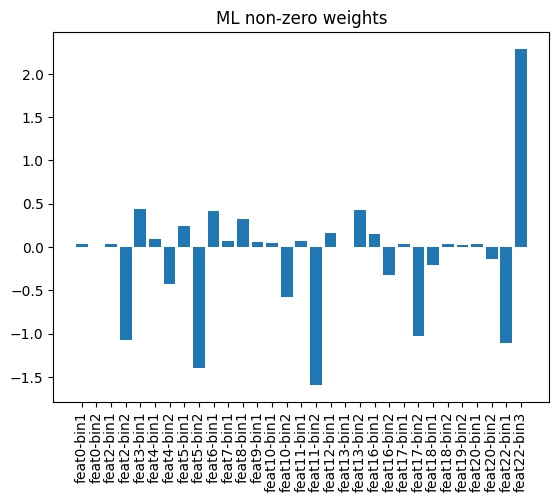

X_disc shape:  (1019, 69)
X_disc columns:  Index(['feat0-bin1', 'feat0-bin2', 'feat0-bin3', 'feat1-bin1', 'feat1-bin2',
       'feat1-bin3', 'feat2-bin1', 'feat2-bin2', 'feat2-bin3', 'feat3-bin1',
       'feat3-bin2', 'feat3-bin3', 'feat4-bin1', 'feat4-bin2', 'feat4-bin3',
       'feat5-bin1', 'feat5-bin2', 'feat5-bin3', 'feat6-bin1', 'feat6-bin2',
       'feat6-bin3', 'feat7-bin1', 'feat7-bin2', 'feat7-bin3', 'feat8-bin1',
       'feat8-bin2', 'feat8-bin3', 'feat9-bin1', 'feat9-bin2', 'feat9-bin3',
       'feat10-bin1', 'feat10-bin2', 'feat10-bin3', 'feat11-bin1',
       'feat11-bin2', 'feat11-bin3', 'feat12-bin1', 'feat12-bin2',
       'feat12-bin3', 'feat13-bin1', 'feat13-bin2', 'feat13-bin3',
       'feat14-bin1', 'feat14-bin2', 'feat14-bin3', 'feat15-bin1',
       'feat15-bin2', 'feat15-bin3', 'feat16-bin1', 'feat16-bin2',
       'feat16-bin3', 'feat17-bin1', 'feat17-bin2', 'feat17-bin3',
       'feat18-bin1', 'feat18-bin2', 'feat18-bin3', 'feat19-bin1',
       'feat19-bin2', 'fea

In [7]:
start_time = time.time()

scorecard = Scorecard()
caim_1ook_ml_model, caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=None)

#scorecard.cross_val_score()
mse, caim_accuracy, auc = scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=40)

scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
scorecard.plot_accuracy_vs_sparsity(caim_accuracy, num_nonzero_weights)

In [ ]:
start_time = time.time()
scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING',
                model_method='ML', 
                use_sbc=True,
                num_nonzero_weights=None)

scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
scorecard.plot_accuracy_vs_sparsity()

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING',
                model_method='ML', 
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)

scorecard.cross_val_score()
end_time = time.time()
print(f'Execution time: {end_time - start_time} seconds')

In [ ]:
scorecard.plot_accuracy_vs_sparsity()

## wine quality dataset
model wine quality, score between 0 and 10, based on physicochemical tests

https://archive.ics.uci.edu/dataset/186/wine+quality

In [ ]:
# fetch dataset 
wine_quality_data = fetch_ucirepo(id=186) 

# data (as pandas dataframes) 
wine_quality_X = wine_quality_data.data.features 
wine_quality_y = wine_quality_data.data.targets 
  
# metadata 
print(wine_quality_data.metadata) 
  
# variable information 
print(wine_quality_data.variables) 

In [ ]:
wine_quality_y = pd.Series(wine_quality_y['quality'], name='quality')

In [ ]:
wine_quality_y.value_counts()

In [ ]:
wine_quality_y.hist()
plt.xlabel('wine quality')
plt.ylabel('drequency')
plt.title('distribution of wine quality')

In [ ]:
categorical_columns = wine_quality_X.select_dtypes(include=['object']).columns
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    wine_quality_X[col] = wine_quality_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {wine_quality_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=18)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(wine_quality_X, wine_quality_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## car evaluation dataset
evaluate car acceptability

https://archive.ics.uci.edu/dataset/19/car+evaluation

In [ ]:
# fetch dataset 
car_evaluation_data = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
car_evaluation_X = car_evaluation_data.data.features 
car_evaluation_y = car_evaluation_data.data.targets 
  
# metadata 
print(car_evaluation_data.metadata) 
  
# variable information 
print(car_evaluation_data.variables) 

In [ ]:
car_evaluation_y = pd.Series(car_evaluation_y['class'], name='class')

In [ ]:
car_evaluation_y.value_counts()

In [ ]:
car_evaluation_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
# get type of each column
print("types: ", car_evaluation_X.dtypes)

# show categorical columns
print("\nobject columns: ", car_evaluation_X.select_dtypes(include=['object']).columns)
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", car_evaluation_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", car_evaluation_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

In [ ]:
categorical_columns = car_evaluation_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    car_evaluation_X.loc[:, col] = car_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {car_evaluation_X[col].unique()}")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_1ook_ml_model, car_caim_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_infbins_1ook_ml_model, car_infbins_1ook_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
car_caim_diffcoding_ml_model, car_caim_diffcoding_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING',
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
car_infbins_diffcoding_ml_model, car_infbins_diffcoding_ml_weights = scorecard.fit(car_evaluation_X, car_evaluation_y, categorical_columns, 
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING',
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## abalone
predict the age of abalone from physical measurements?

https://archive.ics.uci.edu/dataset/1/abalone

In [ ]:
# fetch dataset 
abalone_data = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
abalone_X = abalone_data.data.features 
abalone_y = abalone_data.data.targets 
  
# metadata 
print(abalone_data.metadata) 
  
# variable information 
print(abalone_data.variables) 

abalone_y  = pd.Series(abalone_y ['Rings'], name='Rings')
print(abalone_y .value_counts())
abalone_y.hist()
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.title('Distribution of Rings')

In [ ]:
categorical_columns = abalone_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    abalone_X.loc[:, col] = abalone_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {abalone_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_1ook_ml_model, abalone_caim_1ook_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_infbins_1ook_ml_model, abalone_infbins_1ook_ml_weights = scorecard.fit(abalone_X, abalone_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=10)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
abalone_caim_diffcoding_ml_model, abalone_caim_diffcoding_ml_weights = scorecard.fit(abalone_X, abalone_y,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
abalone_infbins_diffcoding_ml_model, abalone_infbins_diffcoding_ml_weights = scorecard.fit(abalone_X, abalone_y,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## balance scale
classify each example as having the balance scale tip to the right, tip to the left, or be balanced (from 1 to 5)

https://archive.ics.uci.edu/dataset/12/balance+scale

In [ ]:
# fetch dataset 
balance_scale_data = fetch_ucirepo(id=12) 
  
# data (as pandas dataframes) 
balance_scale_X = balance_scale_data.data.features 
balance_scale_y = balance_scale_data.data.targets 
  
# metadata 
print(balance_scale_data.metadata) 
  
# variable information 
print(balance_scale_data.variables) 

balance_scale_y  = pd.Series(balance_scale_y['class'], name='class')
print(balance_scale_y.value_counts())
balance_scale_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = balance_scale_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    balance_scale_X.loc[:, col] = balance_scale_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {balance_scale_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_scale_caim_1ook_ml_model, balance_scale_caim_1ook_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_scale_infbins_1ook_ml_model, balance_scale_infbins_1ook_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y,categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
balance_scale_caim_diffcoding_ml_model, balance_scale_caim_diffcoding_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y,categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
balance_scale_infbins_diffcoding_ml_model, balance_scale_infbins_diffcoding_ml_weights = scorecard.fit(balance_scale_X, balance_scale_y,categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## lenses

classes:
- 1 : the patient should be fitted with hard contact lenses,
- 2 : the patient should be fitted with soft contact lenses,
- 3 : the patient should not be fitted with contact lenses.


https://archive.ics.uci.edu/dataset/58/lenses

In [ ]:
# fetch dataset 
lenses_data = fetch_ucirepo(id=58) 
  
# data (as pandas dataframes) 
lenses_X = lenses_data.data.features 
lenses_y = lenses_data.data.targets
  
# metadata 
print(lenses_data.metadata) 
  
# variable information 
print(lenses_data.variables) 

lenses_y  = pd.Series(lenses_y['class'], name='class')
print(lenses_y.value_counts())
lenses_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = lenses_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    lenses_X.loc[:, col] = lenses_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {lenses_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_1ook_ml_model, lenses_caim_1ook_ml_weights = scorecard.fit(lenses_X, lenses_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_1ook_ml_model, lenses_infbins_1ook_ml_weights = scorecard.fit(lenses_X, lenses_y,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_caim_diffcoding_ml_model, lenses_caim_diffcoding_ml_weights = scorecard.fit(lenses_X, lenses_y,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
lenses_infbins_diffcoding_ml_model, lenses_infbins_diffcoding_ml_weights = scorecard.fit(lenses_X, lenses_y,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## student performance
predict student performance in secondary education (high school)

https://archive.ics.uci.edu/dataset/320/student+performance

In [ ]:
# fetch dataset 
student_performance_data = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
student_performance_X = student_performance_data.data.features 
student_performance_y = student_performance_data.data.targets 
  
# metadata 
print(student_performance_data.metadata) 
  
# variable information 
print(student_performance_data.variables) 

student_performance_y = pd.Series(student_performance_y['G1'], name='G1')
print(student_performance_y.value_counts())
student_performance_y.hist()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

In [ ]:
categorical_columns = student_performance_X.select_dtypes(include=['object']).columns
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    student_performance_X.loc[:, col] = student_performance_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {student_performance_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_performance_caim_1ook_ml_model, student_performance_caim_1ook_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_performance_infbins_1ook_ml_model, student_performance_infbins_1ook_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns,   
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_performance_caim_diffcoding_ml_model, student_performance_caim_diffcoding_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
student_performance_infbins_diffcoding_ml_model, student_performance_infbins_diffcoding_ml_weights = scorecard.fit(student_performance_X, student_performance_y, categorical_columns,   
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=True,
                num_nonzero_weights=num_nonzero_weights)
scorecard.cross_val_score()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")